In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

#### Acknolwedgements 
- 3Blue1Brown Grant Sanderson channel ( https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw )
- YOLO training by Murtaza's Workshop


## Main building blocks of Image Processing Techniques

#### Convolution

- What is a convolution
- How it is used in processing images
- How it is used in CNN

### What is a convolution in mathematics?

<table><tr><td>

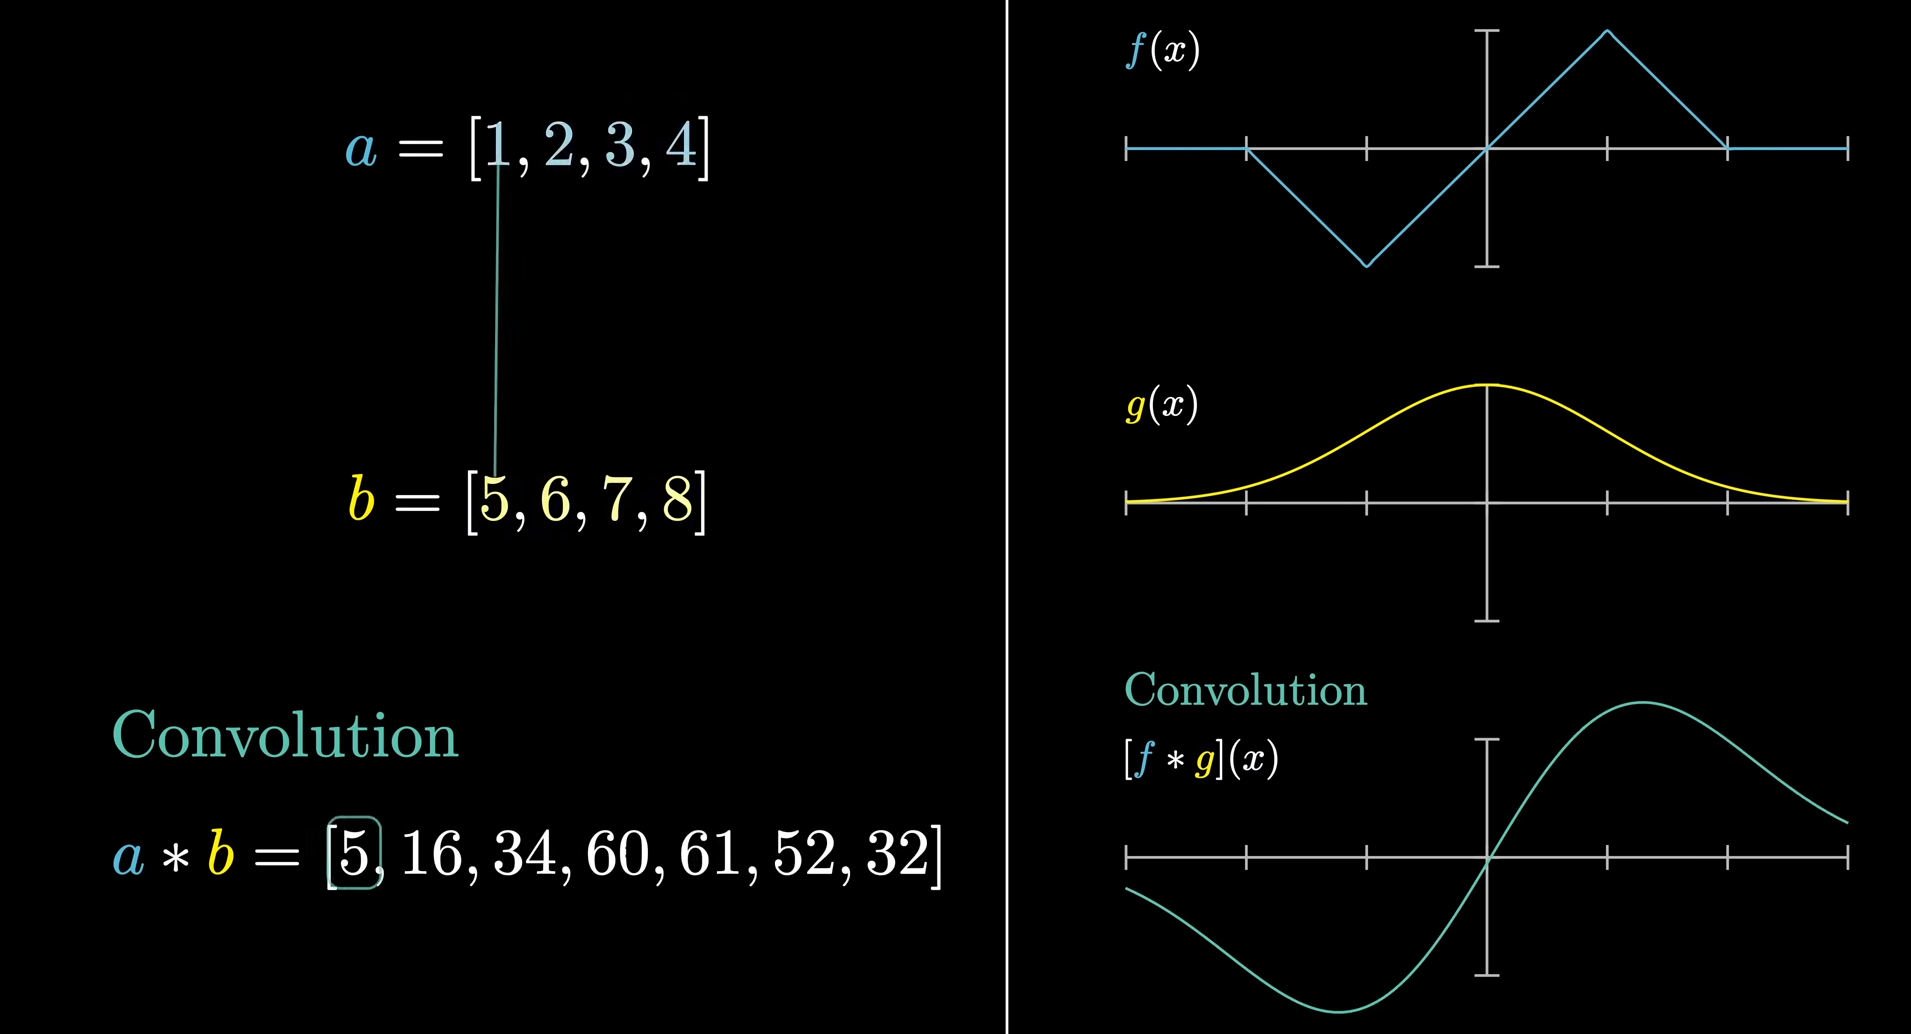 <td>
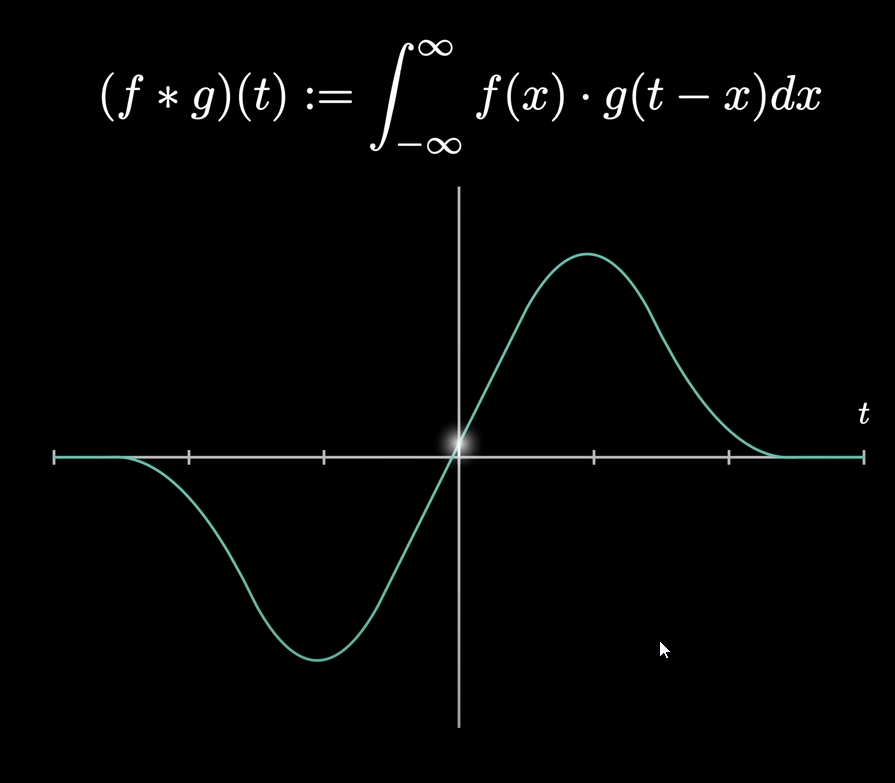
</table>

- Discrete Convolution and Continuous Convolution
    - Convolution in Image Processing
    - Convolution in Probability 
    - Convolution in solving Differential Equations
    - Polynomial Multiplication

Convolution of two funcions: 

$ (f*g)(t) = \int_{-\infty}^{\infty} f(x).g(t-x) dx $

- produces a third function that represents how the shape of one is modified by the other
- (t-x) : Meaning it means that we're "flipping" and "shifting" the function g by t units and then evaluating it at x.

- So in words, you can think of the convolution of f and g at a particular t as the result of the following process:
    - First, flip the function g around the vertical axis.
    - Then, shift g by t units to the right.
    - Multiply f(x) and g(t-x) for each x.
    - Finally, calculate the integral of this product over all x.
    - The value of the integral gives the value of the convolution (f*g)(t) at that particular t.

### Discrete Convolution
- Examples Probability

    - Pair of fair dice ( flipp second row and offset +1, than counting pairs ) <table><tr><td> 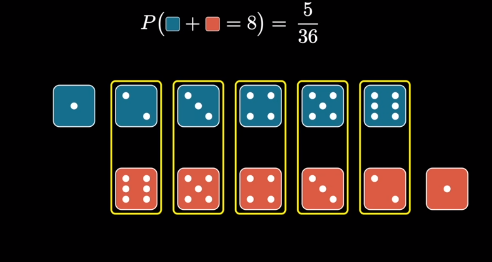 <td> 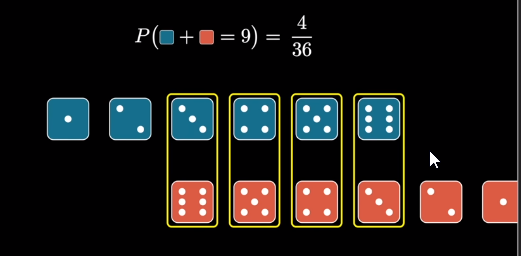</table>
    - Loaded Pair of dice ( Non-uniform probabilities) more clear how it works <table><tr><td> 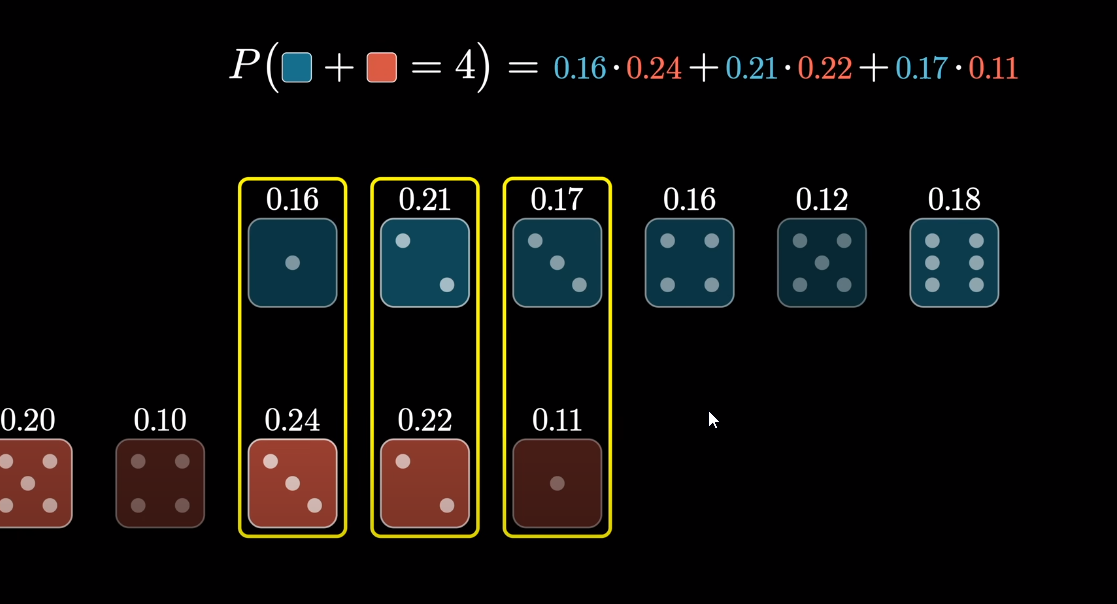 <td>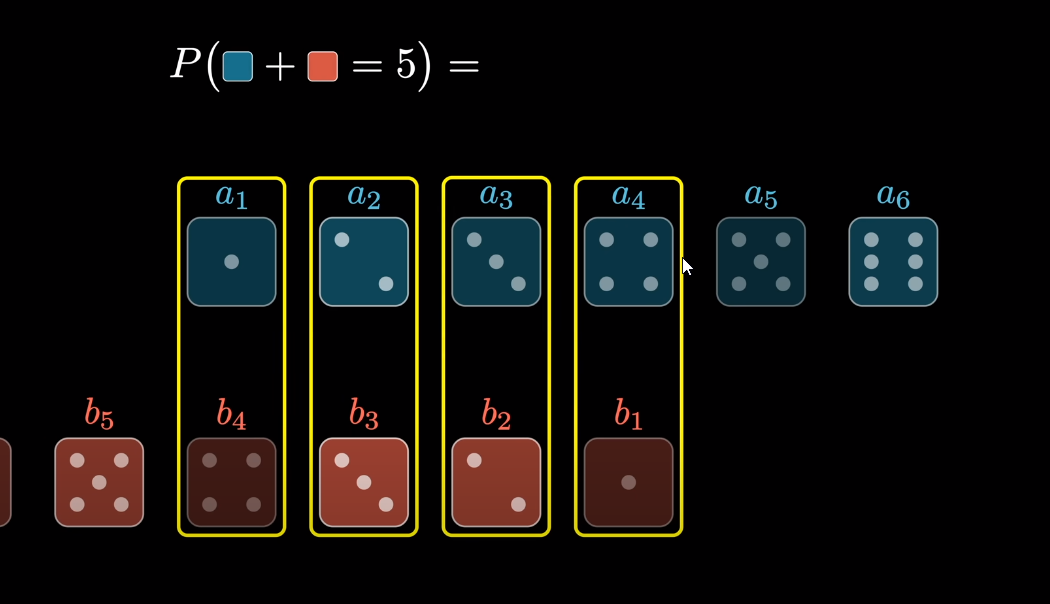</table>
    - Convolution of $ (a_i) and (b_i) $ <table><tr><td> 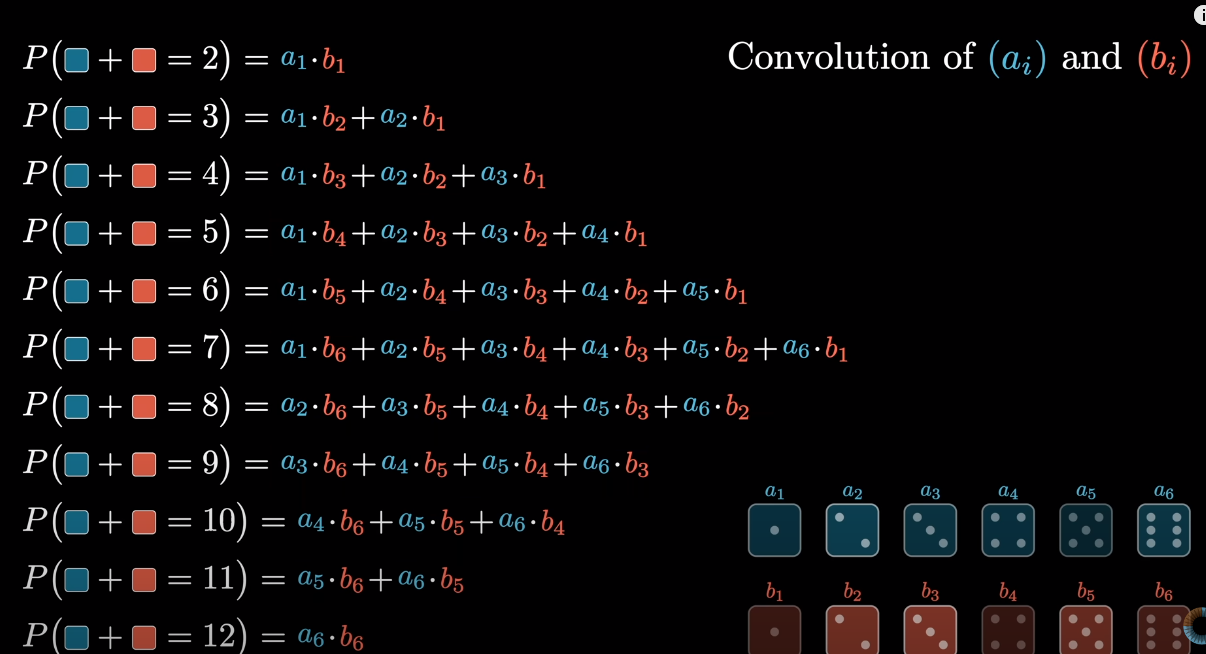 <td> 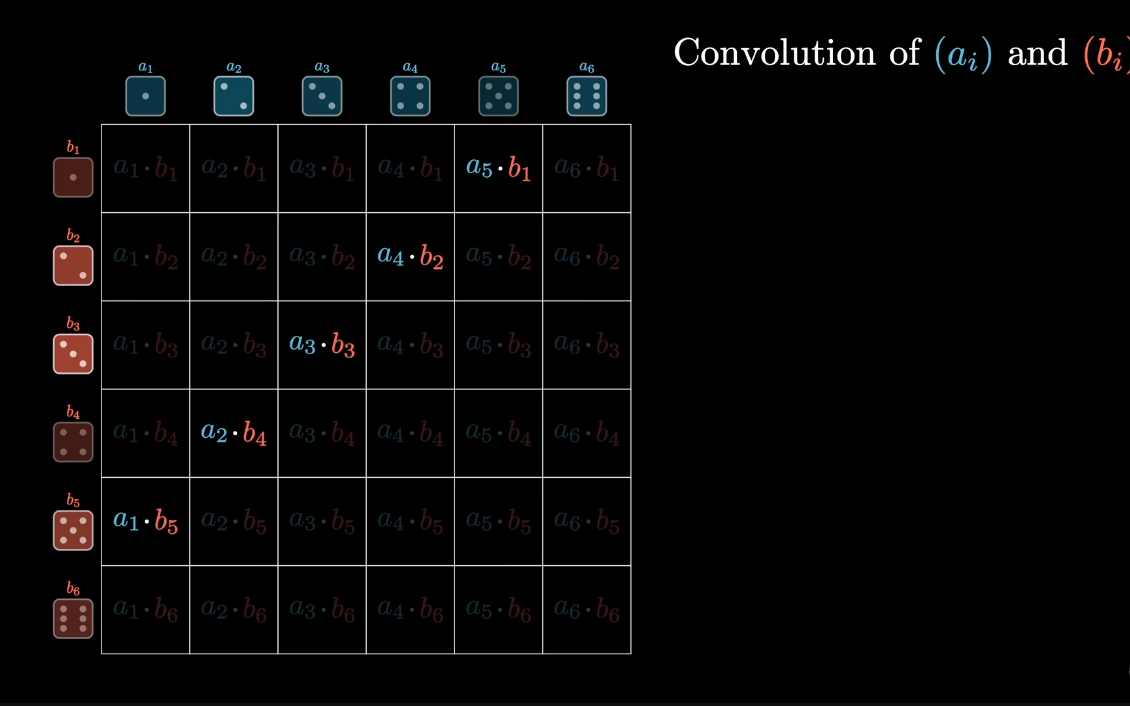 </table>
    - $$ (a_i * b_i) = \sum_{i+j=n} a_j.b_{j} $$

In [2]:
a = np.arange(1,4)
b = np.arange(4,7)
convolution_ab = np.convolve(a,b)
convolution_ab

array([ 4, 13, 28, 27, 18])

In [3]:
# Manually calculate convolution
conv = []
flipped_b = np.flip(b)
# Pad the array 'a' with zeros at both ends
a_padded = np.pad(a, (len(b)-1, len(b)-1)) # (array, before_1, after_1)

# Apply convolution
for i in range(len(a_padded)-len(b)+1):
    segment = a_padded[i:i+len(b)]
    conv.append(np.sum(segment * flipped_b))

print(conv)
    

[4, 13, 28, 27, 18]


- This padding will be very usefull for Image Processing when we will be having problems with the edges of the image.
### Moving average 
- #### 2D array - Blurring 
/<table><tr><td> 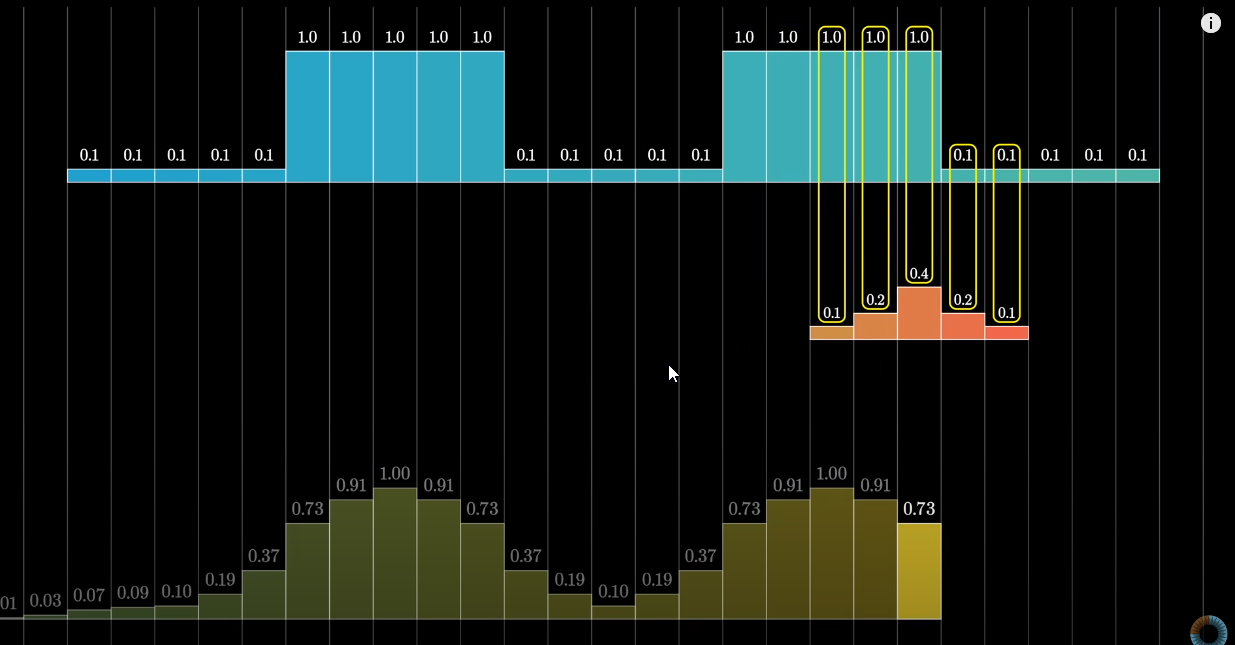 <td> 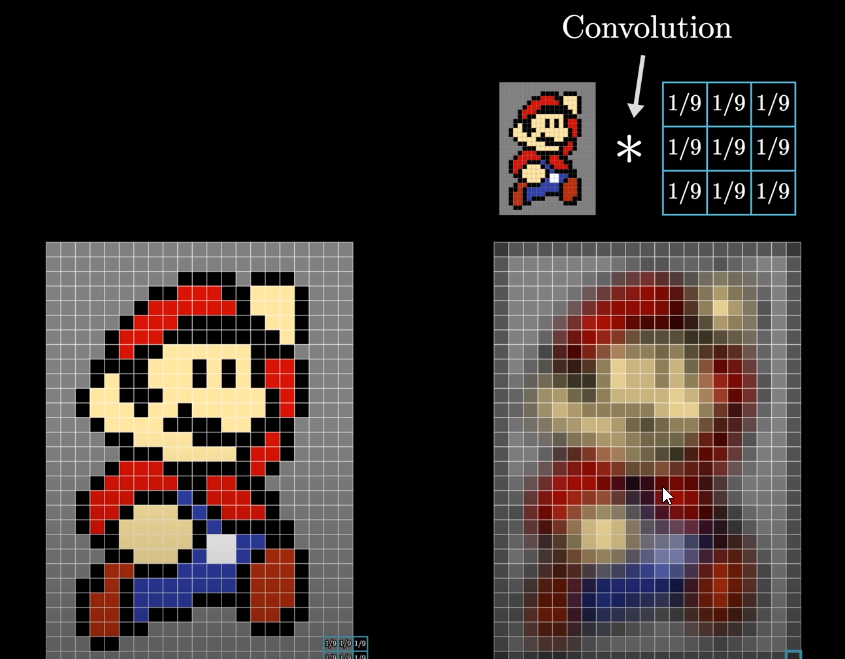</table>
- ### Gaussian Blur ( more resebling to a real life lens blur)
    - using a Gaussian function ( bell curve ) as the kernel ( kernel is the matrix that we use to convolve the image with )
    - The Gaussian function gives less weight to pixels further away from the center of the kernel.
    -<table><tr><td>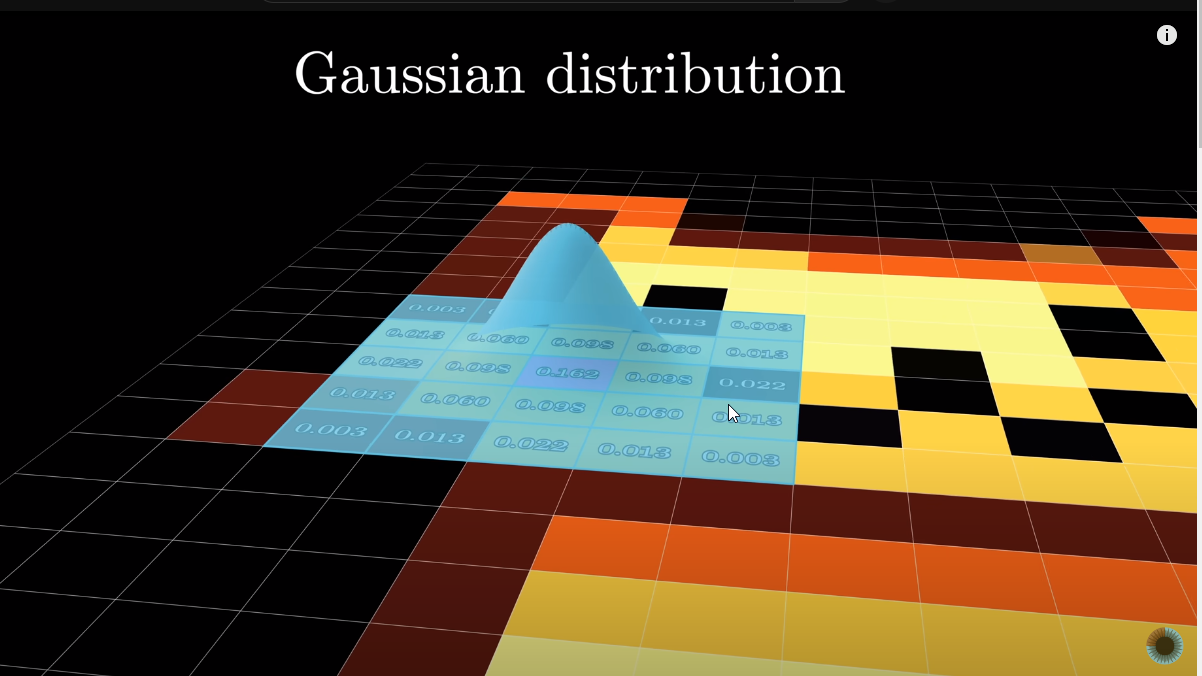 <td> ![image-4.png](attachment:image-4.png)<table> 

### Convolution with a kernel
- Edge detection
- Sharpening
- Embossing .. etc

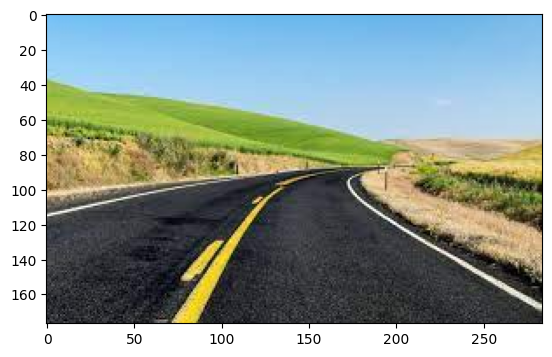

In [4]:
# Blur an image
image = cv2.imread('lane1.png')

# OpenCV reads images in BGR (Blue, Green, Red) format,
# but matplotlib expects RGB (Red, Green, Blue) images.

plt.imshow(image[:,:,::-1])
# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
# image

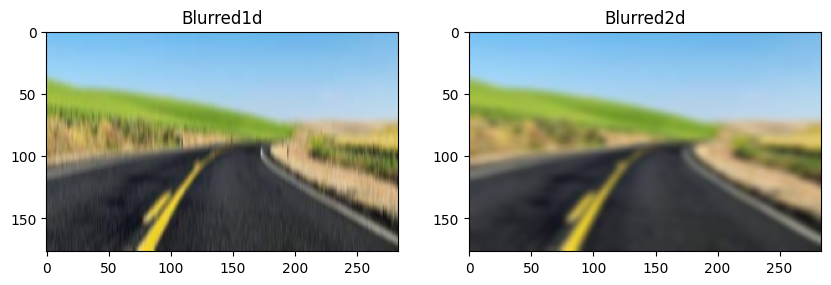

In [5]:
# Create a 3x3 kernel with all elements equal
kernel = np.ones((3, 3))/ 9 # sum is 1

gaussian_kernel_1d = cv2.getGaussianKernel(10, 3)  # (size, standard deviation)
gaussian_kernel_2d = np.outer(gaussian_kernel_1d, gaussian_kernel_1d.transpose()) # outer product of 1D kernel with its self 

# Blur the image
blurred_1d = cv2.filter2D(image_rgb, -1, gaussian_kernel_1d)
blurred_2d = cv2.filter2D(image_rgb, -1, gaussian_kernel_2d)

# Display the original and blurred images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(blurred_1d)
axs[0].set_title('Blurred1d')

axs[1].imshow(blurred_2d)
axs[1].set_title('Blurred2d')

plt.show()


In [6]:
def convolve_an_image(image, kernel):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    blurred_2d = cv2.filter2D(image_rgb, -1, kernel)
    
    # Display the original and blurred images
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(image_rgb)
    axs[0].set_title('Original')

    axs[1].imshow(blurred_2d)
    axs[1].set_title('Blurred2d')

    plt.show()

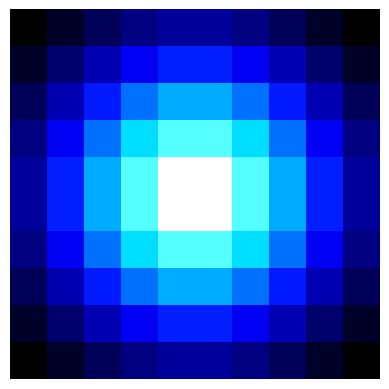

In [7]:
def show_colored_kernel(kernel):
    """
    Visualize a given kernel as an image.
    """
    # Normalize the kernel
    kernel_norm = (kernel - kernel.min()) / (kernel.max() - kernel.min())
    # Scale to 0-255
    kernel_scaled = (255 * kernel_norm).astype(np.uint8)
    # By ensuring that the kernel is of the correct data type and range,
    #  you can avoid potential issues when you use the kernel to process images.
    
    # Apply the color map
    kernel_colored = cv2.applyColorMap(kernel_scaled, cv2.COLORMAP_HOT)
    # Show the colored kernel
    plt.imshow(kernel_colored)
    plt.axis('off')
    plt.show()
show_colored_kernel(gaussian_kernel_2d)

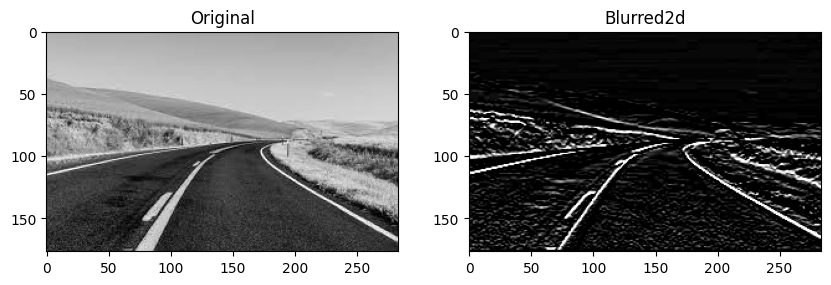

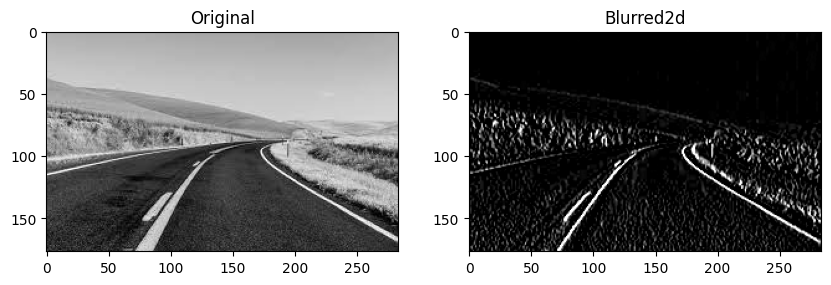

In [8]:
# Sharpening an image
kernel = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]]) 
kernel.sum()
# convolve_an_image(image, kernel)
# show_colored_kernel(kernel)

# Edge detection ( Sobel Filter )
sobel_kernel_horizontal = np.array([[-1, -2, -1], [0, 0, 0],[1, 2, 1]])
sobel_kernel_vertical = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])


image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

convolve_an_image(image_gray, sobel_kernel_horizontal)
convolve_an_image(image_gray, sobel_kernel_vertical)

#

### Multipling two Polynomials
-<table><tr><td>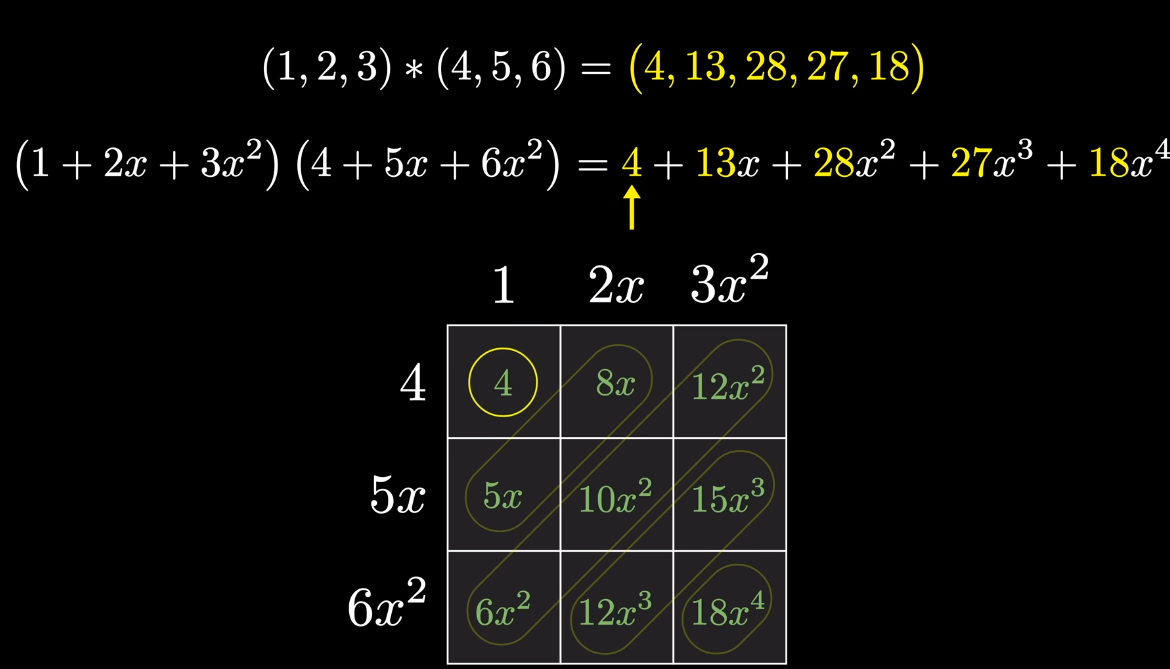 <td> 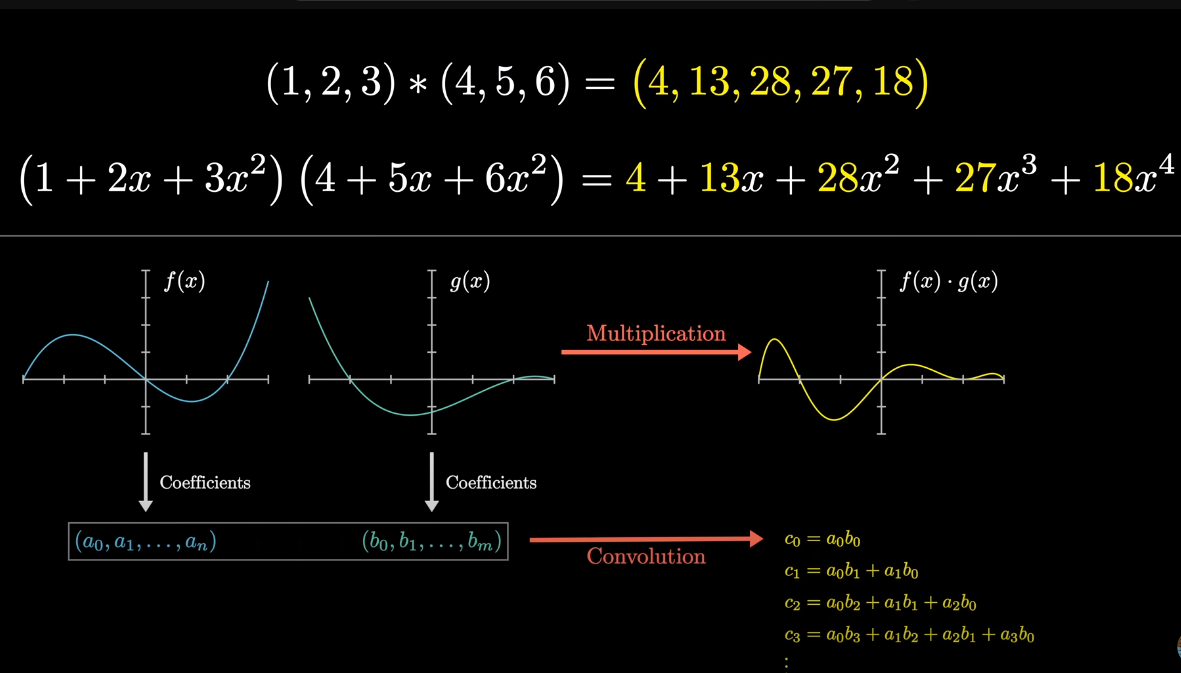 </table>
### Fast Convolution algorithm 
 - Extracting the coefficients and taking a convolution of the coefficients of the two polynomials will give us the coefficients of the product polynomial
- Sample the two polynomials at enough output and solve the linear system to recover the coefficients of the product polynomial
- Here comes FFT (we sample the two polynomials with the special set of complex numbers called the roots of unity)
- The system will have a lot of redundancies and we can use the fast Fourier transform to solve the system in O(nlogn) time

-<table><tr><td>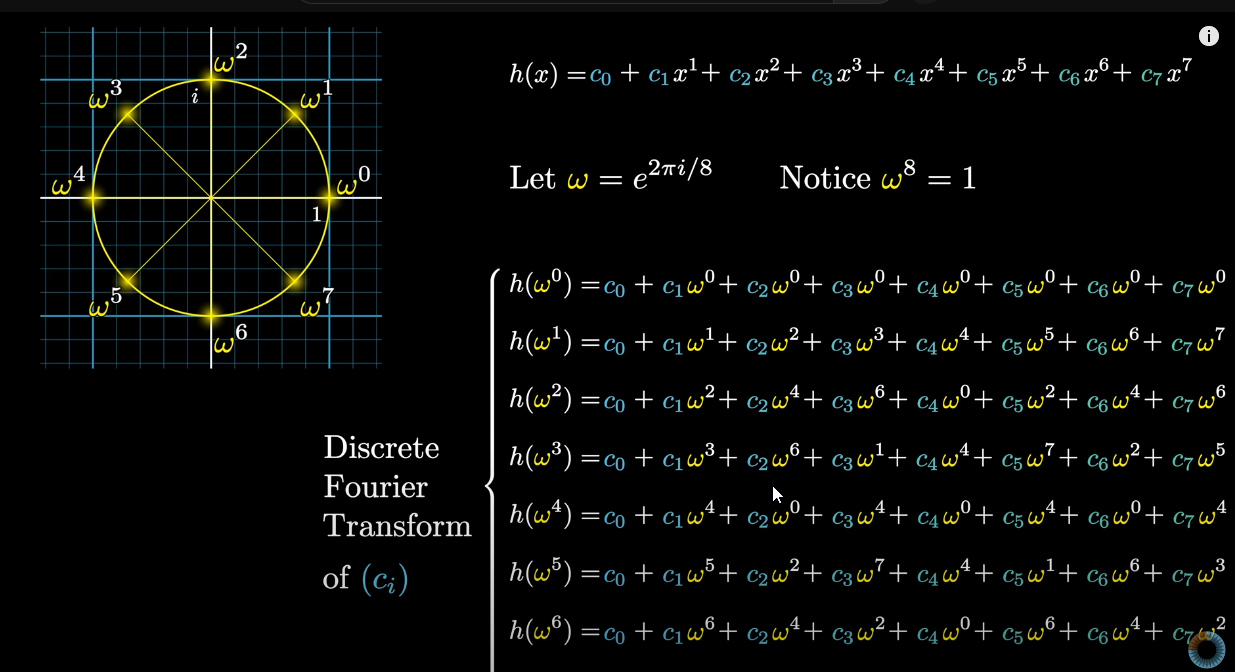<td>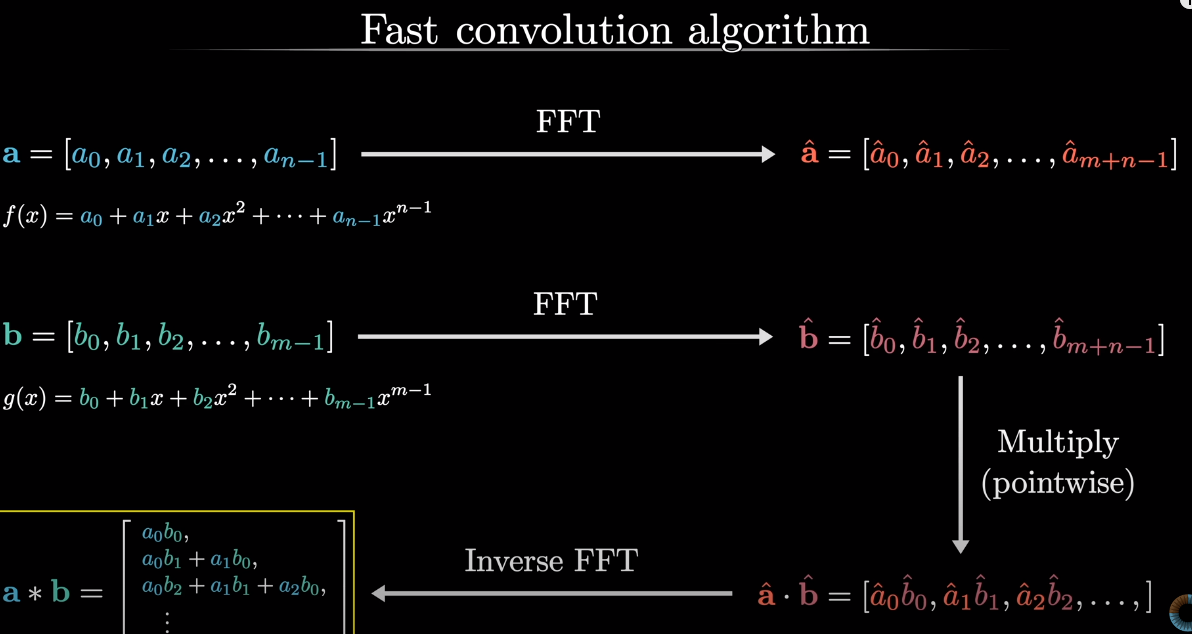<table>